<a href="https://colab.research.google.com/github/uri-ai-lab/Machine-Learning-in-Python-Colab-notebooks/blob/main/Workshop_8_Introduction_to_Natural_Language_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Introduction to Natural Language Processing

Look at the technologies around us:

* Spellcheck and autocorrect
* Auto-generated video captions
* Virtual assistants like Amazon’s Alexa
* Autocomplete
* Your news site’s suggested articles

What do they have in common?

All of these handy technologies exist because of natural language processing! Also known as NLP, the field is at the intersection of linguistics, artificial intelligence, and computer science. The goal? Enabling computers to interpret, analyze, and approximate the generation of human languages (like English or Spanish).

NLP got its start around 1950 with Alan Turing’s test for artificial intelligence evaluating whether a computer can use language to fool humans into believing it’s human.

But approximating human speech is only one of a wide range of applications for NLP! Applications from detecting spam emails or bias in tweets to improving accessibility for people with disabilities all rely heavily on natural language processing techniques.

NLP can be conducted in several programming languages. However, Python has some of the most extensive open-source NLP libraries, including the Natural Language Toolkit or NLTK.

## Text Preprocessing

Cleaning and preparation are crucial for many tasks, and NLP is no exception. Text preprocessing is usually the first step you’ll take when faced with an NLP task.

Without preprocessing, your computer interprets "the", "The", and "<p>The" as entirely different words. There is a LOT you can do here, depending on the formatting you need. Lucky for you, Regex and NLTK will do most of it for you! Common tasks include:

* Noise removal — stripping text of formatting (e.g., HTML tags).

* Tokenization — breaking text into individual words.

* Normalization — cleaning text data in any other way:

  * Stemming is a blunt axe to chop off word prefixes and suffixes. “booing” and “booed” become “boo”, but “computer” may become “comput” and “are” would remain “are.”
  * Lemmatization is a scalpel to bring words down to their root forms. For example, NLTK’s savvy lemmatizer knows “am” and “are” are related to “be.”
  * Other common tasks include lowercasing, stopwords removal, spelling correction, etc.

  The difference between stemming and lemmatization is, lemmatization considers the context and converts the word to its meaningful base form, whereas stemming just removes the last few characters, often leading to incorrect meanings and spelling errors.

![img1](https://drive.google.com/uc?id=1J0AGAMt93z_1Cq_8fu7oVZJ-X_3816oa)


In [ ]:
import numpy as np
import re #regular expressions
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
import seaborn as sns

import pandas as pd
from nltk import PorterStemmer
from textblob import TextBlob #for nlp

from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

### Importing data file

[data file link](https://www.kaggle.com/datasets/gpreda/covid19-tweets)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweets = pd.read_csv('/content/drive/MyDrive/AI lab workshops/Workshop notebooks/Python/Resources/covid19_tweets.csv')

In [ ]:
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


### **Data Pre-processing**

In [ ]:
# function to replace a pattern
def remove_pattern(text, pattern):
    r = re.findall(pattern, text)
    for i in r:
        text = re.sub(i, "", text)
    return text


In [ ]:
tweets['text'] = np.vectorize(remove_pattern)(tweets['text'], "@[\w]*")
tweets['text'] = np.vectorize(remove_pattern)(tweets['text'], "#[\w]*")
tweets['text'] = np.vectorize(remove_pattern)(tweets['text'], '[0-9]')
tweets['text'] = tweets['text'].str.replace("[^a-zA-Z#]", " ") #remove non-alphabets
tweets['text'] = tweets['text'].apply(lambda x: ' '.join([i for i in x.split() if len(i) > 3])) #remove words with less than 3 characters
tweets.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  after removing the cwd from sys.path.


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,smelled scent hand sanitizers today someone pa...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,wouldn have made more sense have players their...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump never once claimed hoax claim that this ...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,gift give appreciation simple things that were...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,July Media Bulletin Novel https MNEEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


### **Tokenization**

In [ ]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True, reduce_len=True)
tweets.text = [tknzr.tokenize(tweet) for tweet in tweets.text]
tweets.text[0]

['smelled',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'someone',
 'past',
 'would',
 'think',
 'they',
 'were',
 'intoxicated',
 'that',
 'https',
 'QZvYbrOgb']

### **Lemmatization using Wordnet**

In [ ]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4') #Open Multilingual Wordnet

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

Word      +    Type (POS tag)     —>     Lemmatized Word

driving    +    verb      ‘v’            —>     drive

dogs       +    noun      ‘n’           —>     dog

In [ ]:
le = WordNetLemmatizer()
lemma_text = []
for index in range(len(tweets.text)):
  tweet = [le.lemmatize(word, pos = "v") for word in tweets.text[index]]
  lemma_text.append(tweet)

print(lemma_text[0:10])

[['smell', 'scent', 'hand', 'sanitizers', 'today', 'someone', 'past', 'would', 'think', 'they', 'be', 'intoxicate', 'that', 'https', 'QZvYbrOgb'], ['wouldn', 'have', 'make', 'more', 'sense', 'have', 'players', 'their', 'respect', 'https', 'QvWzgyPu'], ['Trump', 'never', 'once', 'claim', 'hoax', 'claim', 'that', 'this', 'effort', 'https', 'JkkvHWHb'], ['gift', 'give', 'appreciation', 'simple', 'things', 'that', 'be', 'always', 'around', 'https', 'ZpOAlFXcW'], ['July', 'Media', 'Bulletin', 'Novel', 'https', 'MNEEcsJHh'], ['deaths', 'continue', 'rise', 'almost', 'ever', 'Politicians', 'businesses', 'want', 'https', 'hXMHooXXC'], ['Will', 'Change', 'Work', 'General', 'recruit', 'specifically', 'https', 'bjZxzGPMbK'], ['have', 'wear', 'face', 'cover', 'when', 'shop', 'this', 'include', 'visit', 'your', 'local', 'Community', 'Pharmacy', 'https', 'OSuQkdd'], ['Praying', 'good', 'health', 'recovery'], ['POPE', 'Prophet', 'Sadhu', 'Sundar', 'Selvaraj', 'Watch', 'here', 'https', 'XRTyKVji', 'htt

### **Stop-word Elimination**

“Stop words” typically refers to the most common words in a language. Stop words typically need to be filtered out before or after the data (text) is processed. Stop words are a set of commonly used words in a language. Examples of stop words in English are “a”, “the”, “is”, “are” and etc.

In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [ ]:
stop = set(stopwords.words('english'))
all_stop =['https', 'say']

In [ ]:
tokens_without_sw =[]
for index in range (len(lemma_text)):
  tokens = [word for word in lemma_text[index] if not word in stop]
  tokens_without_sw.append(tokens)

In [ ]:
tokens_without_sw[:1]

[['smell',
  'scent',
  'hand',
  'sanitizers',
  'today',
  'someone',
  'past',
  'would',
  'think',
  'intoxicate',
  'https',
  'QZvYbrOgb']]

In [ ]:
tokens_without_all_stop =[]
for index in range (len(tokens_without_sw)):
  tokens = [word for word in tokens_without_sw[index] if not word in all_stop]
  tokens_without_all_stop.append(tokens)

In [ ]:
 tokens_without_all_stop[:1]

[['smell',
  'scent',
  'hand',
  'sanitizers',
  'today',
  'someone',
  'past',
  'would',
  'think',
  'intoxicate',
  'QZvYbrOgb']]

In [ ]:
tokens_filtered =[]
for index in range (len(tokens_without_all_stop)):
  tokens = [token  for token in tokens_without_all_stop[index] if len(token)>3]
  tokens_filtered.append(tokens)
tokens_filtered[0]

['smell',
 'scent',
 'hand',
 'sanitizers',
 'today',
 'someone',
 'past',
 'would',
 'think',
 'intoxicate',
 'QZvYbrOgb']

In [ ]:
for i in range(len(tokens_filtered)):
    tokens_filtered[i] = ' '.join(tokens_filtered[i])
tweets['text'] = tokens_filtered
tweets.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,smell scent hand sanitizers today someone past...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,make sense players respect QvWzgyPu,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,Trump never claim hoax claim effort JkkvHWHb,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,gift give appreciation simple things always ar...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,July Media Bulletin Novel MNEEcsJHh,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [ ]:
tweets.text[0]

'smell scent hand sanitizers today someone past would think intoxicate QZvYbrOgb'

### **VADER**

VADER (Valence Aware Dictionary for sEntiment Reasoning) is a sentiment analysis model that uses a set of rules to specify a mathematical model without explicitly coding it. VADER consumes fewer resources as compared to Machine Learning models as there is no need for vast amounts of training data. VADER has been included in the NLTK package.

In [ ]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


We first create a column 'Sentiment_scores' for Polarity Score in the tweets dataframe.
**Sentiment scoring** is enabled by algorithms that assess the tone of a transcript on a spectrum of positive to negative.

In [ ]:
tweets['Sentiment_scores'] = tweets['text'].apply(lambda tweet: sia.polarity_scores(tweet))
tweets['Sentiment_scores'][0:10]

0    {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...
1    {'neg': 0.0, 'neu': 0.563, 'pos': 0.437, 'comp...
2    {'neg': 0.0, 'neu': 0.768, 'pos': 0.232, 'comp...
3    {'neg': 0.0, 'neu': 0.492, 'pos': 0.508, 'comp...
4    {'neg': 0.0, 'neu': 0.635, 'pos': 0.365, 'comp...
5    {'neg': 0.0, 'neu': 0.86, 'pos': 0.14, 'compou...
6    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
7    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
8    {'neg': 0.0, 'neu': 0.27, 'pos': 0.73, 'compou...
9    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentiment_scores, dtype: object

We create another column 'compound' in the tweets dataframe to store the compound Sentiment Analysis Score.
The **compound score** is computed by summing the scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive). This is a very useful metric if we want a single unidimensional measure of sentiment for a given sentence.

In [ ]:
tweets['compound'] = tweets['Sentiment_scores'].apply(lambda x:x['compound'])

**Differentiating Positive and Negative Scores**

The compound_result column is used to store the polarity of the tweet (whether it is positive, neutral or negative).


In [ ]:
tweets['compound_result'] = tweets['compound'].apply(lambda score: 'pos' if score > 0 else ('neg' if score < 0 else 'neu'))

In [ ]:
tweets['compound_result'][0:10]

0    pos
1    pos
2    pos
3    pos
4    pos
5    pos
6    neu
7    neu
8    pos
9    neu
Name: compound_result, dtype: object

**Plotting the Sentiment Scores**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


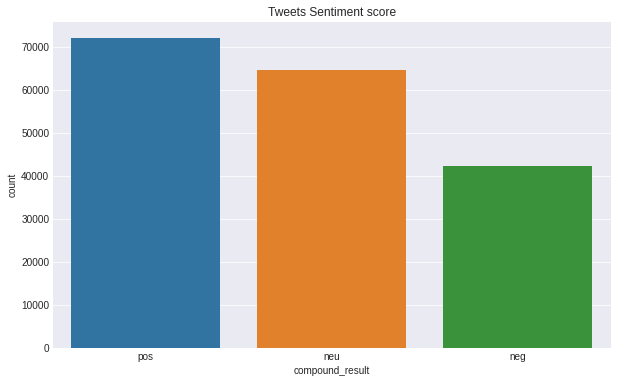

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(tweets['compound_result'])
plt.title('Tweets Sentiment score');

In [ ]:
pip install nrclex

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 396 kB 25.4 MB/s 
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43329 sha256=a0a10bfbbf1eaafedbce16f7d959d959e79682c95ebfae3403368317aceb2c58
  Stored in directory: /root/.cache/pip/wheels/af/2c/9c/dfa19d1b65326c520b32850a9311f6d4eda679ac04dba26081
Successfully built nrclex


### **Measuring Emotions within Tweets**

We can use the NRCLex package to measure various emotions such as joy, anger, anticipation and trust from within a body of text.

In [ ]:
import nltk
from nrclex import NRCLex
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
tweets['text'] = tweets['text'].str.strip()
tweets['text'].head()

0    smell scent hand sanitizers today someone past...
1                  make sense players respect QvWzgyPu
2         Trump never claim hoax claim effort JkkvHWHb
3    gift give appreciation simple things always ar...
4                  July Media Bulletin Novel MNEEcsJHh
Name: text, dtype: object

In [ ]:
word_US = tweets[tweets['user_location'].str.contains('United States',na=False)]['text'] # tweets with user location USA
word_US = str([cell.encode('utf-8') for cell in word_US]) # converts the text into utf-8 unicode as for best results when using NRCLex, 'text' should be unicode
word_US

"[b'acknowledge lack rebuild home hospital survive PLXqKcKd', b'everyone spread Another study accurate hOCAzYq', b'epidemic give person look might able round BfXCbWF', b'National state impact elder population This societal loss wisdom history gaIfWiDcB', b'Three term hear Good advice ykSvJbILKP', b'Great yesterday XSiCvTSga', b'Late Baby Sister leave behind three sons eldest right diagnose bnCpoWCMI', b'Children affect infect Florida Covid XZPMnez', b'progress point joke That good could sort AKDfTtpsFY', b'school reopen spread biblical scale', b'area major spread full hospitals This need nLfpYvEvZ DulqthAtyT', b'Green fault Next time foot heck Quarantine mean quarantine JPlbrLqXE', b'Resources help departments identify report counterfeit KDksIiDft', b'Year United States fail control fail keep cities peacefull Donald BiKeRgTnO', b'preprint COVID Data Driven Mean Field Type Game Perspective DEVLHehga', b'preprint Country distance reveal effectiveness travel restrictions COVID vxMCaEjs', 

In [ ]:
text_US = NRCLex(word_US)
text_US


In [ ]:
text_US = text_US.raw_emotion_scores #returns raw emotional counts
text_US

{'anger': 509,
 'anticipation': 832,
 'disgust': 348,
 'fear': 885,
 'joy': 464,
 'negative': 1358,
 'positive': 1454,
 'sadness': 708,
 'surprise': 397,
 'trust': 1003}

In [ ]:
text_US = pd.DataFrame(text_US,index=[0]) # convert to Pandas dataframe
text_US


,negative,fear,sadness,trust,positive,anger,surprise,disgust,anticipation,joy
0,1358,885,708,1003,1454,509,397,348,832,464


In [ ]:
text_US = pd.melt(text_US) # used to change the DataFrame format from wide to long
text_US

,variable,value
0,negative,1358
1,fear,885
2,sadness,708
3,trust,1003
4,positive,1454
5,anger,509
6,surprise,397
7,disgust,348
8,anticipation,832
9,joy,464


In [ ]:
text_US.columns = ('Emotions','Count') # assign column names to the Dataframe
text_US = text_US.sort_values('Count') # Sort according to the emotion counts
text_US

,Emotions,Count
7,disgust,348
6,surprise,397
9,joy,464
5,anger,509
2,sadness,708
8,anticipation,832
1,fear,885
3,trust,1003
0,negative,1358
4,positive,1454


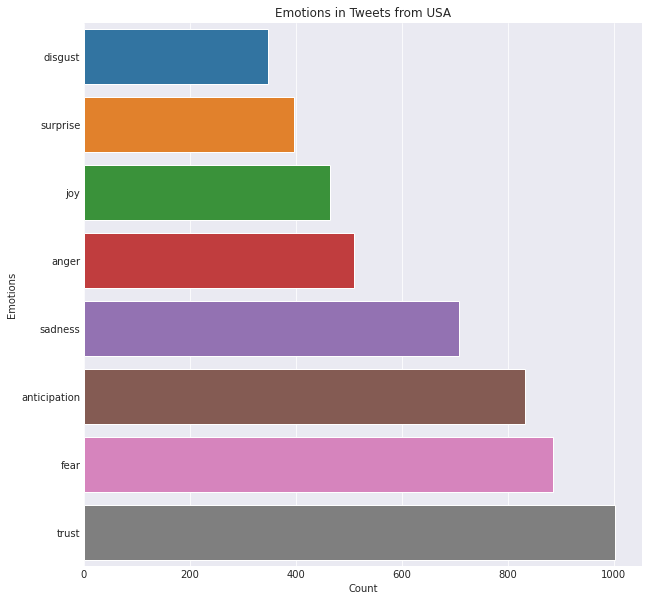

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Emotions in Tweets from USA')
sns.set_style('dark')
sns.barplot(y='Emotions',x='Count',data = text_US[:8]);